In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/kaggle/input/energy-consumption-prediction/Energy_consumption.csv')
df


,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732
...,...,...,...,...,...,...,...,...,...,...,...
995,2022-02-11 11:00:00,28.619382,48.850160,1080.087000,5,Off,Off,21.194696,Saturday,No,82.306692
996,2022-02-11 12:00:00,23.836647,47.256435,1705.235156,4,Off,On,25.748176,Tuesday,Yes,66.577320
997,2022-02-11 13:00:00,23.005340,48.720501,1320.285281,6,Off,On,0.297079,Friday,Yes,72.753471
998,2022-02-11 14:00:00,25.138365,31.306459,1309.079719,3,On,Off,20.425163,Thursday,Yes,76.950389


In [3]:
df['HVACUsage'] = df['HVACUsage'].apply(lambda x: 1 if x == 'On' else 0)
df['LightingUsage'] = df['LightingUsage'].apply(lambda x: 1 if x == 'On' else 0)

features = ['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'HVACUsage', 'LightingUsage', 'RenewableEnergy']

X = df[features]
y = df['EnergyConsumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [5]:
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

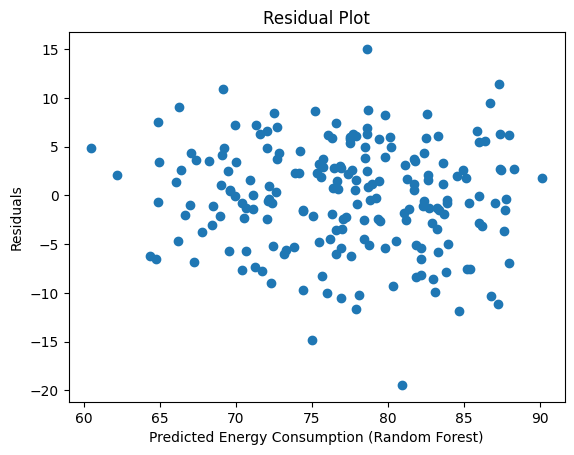

In [6]:
residuals = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals)
plt.xlabel('Predicted Energy Consumption (Random Forest)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


The residuals are the differences between the actual energy consumption and the predicted energy consumption.
Each point on the Y-axis represents the residual for a specific data point. If a point is above the X-axis, it means the model underpredicted the energy consumption for that data point. If a point is below the X-axis, it means the model overpredicted the energy consumption.

The residuals are distributed randomly and show no discernible pattern, indicating that the model is capturing the underlying patterns in the data and making unbiased predictions.



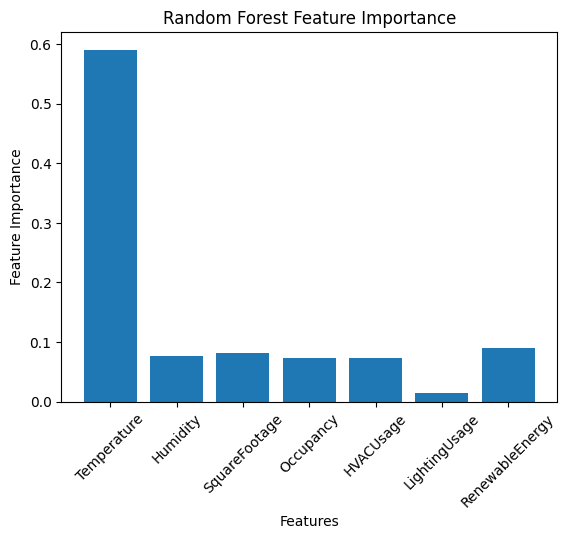

In [7]:
feature_importance = rf_model.feature_importances_
features = X.columns
plt.bar(features, feature_importance)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45)
plt.show()


The plot allows you to visually inspect the relative importance of different features in the model.
Features with higher importance values are considered more influential in predicting the target variable.